# Import datam

In [2]:
import pandas as pd
df = pd.read_csv("medical_examination.csv")

In [36]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25

In [5]:
del df['overweight']

In [39]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


In [38]:
medical_dict = { 1: 0, 2: 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map(medical_dict)
df['gluc'] = df['gluc'].map(medical_dict)


 ## Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

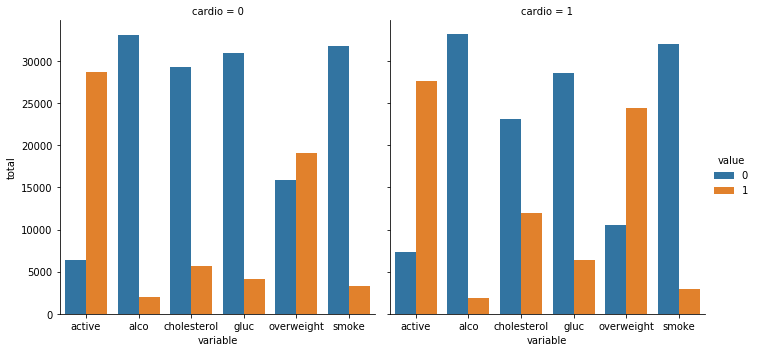

In [41]:
import seaborn as sns
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(
        frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
        id_vars=['cardio']
    )

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.

df_cat = pd.DataFrame(
        df_cat.groupby(
                ['variable', 'value', 'cardio'])['value'].count()).rename(
                columns={'value': 'total'}).reset_index()

# Set up the matplotlib figure and draw the catplot
sns.catplot(x='variable', y='total', data=df_cat, hue='value', col='cardio', kind='bar')

In [42]:
df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


In [44]:
a = pd.melt(
        frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
        id_vars=['cardio']
    )

In [49]:
a.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [47]:
a.groupby(['variable', 'value', 'cardio'])['value'].count()

variable     value  cardio
active       0      0          6378
                    1          7361
             1      0         28643
                    1         27618
alco         0      0         33080
                    1         33156
             1      0          1941
                    1          1823
cholesterol  0      0         29330
                    1         23055
             1      0          5691
                    1         11924
gluc         0      0         30894
                    1         28585
             1      0          4127
                    1          6394
overweight   0      0         15915
                    1         10539
             1      0         19106
                    1         24440
smoke        0      0         31781
                    1         32050
             1      0          3240
                    1          2929
Name: value, dtype: int64

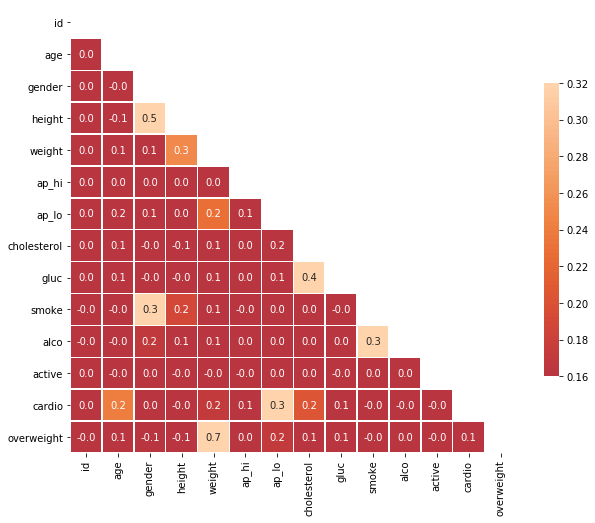

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 #Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 12))

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmin=.16, vmax=.32, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.45, 'format':'%.2f'})